In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load Image and Filter for Color

(600, 1000, 3)


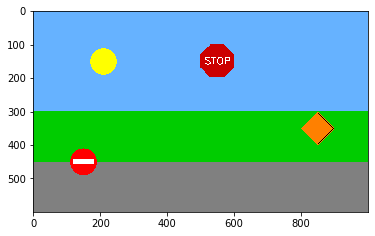

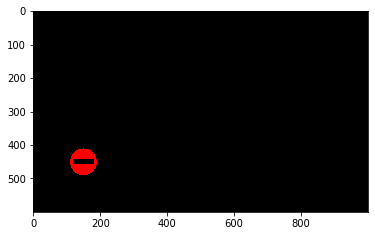

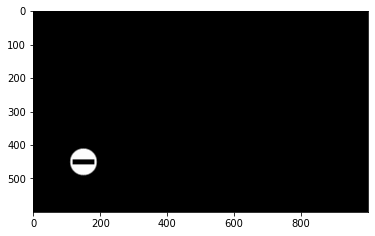

In [12]:
img = cv2.imread('scene_some_signs.png')
print(img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img_blur = cv2.GaussianBlur(img_gray, (5,5), 15)
plt.imshow(cv2.cvtColor(gray_img_blur, cv2.COLOR_BGR2RGB))

#python
# https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
bgr = [0, 0, 255]
thresh = 5
 
minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])
 
maskBGR = cv2.inRange(img, minBGR, maxBGR)
img_binary = cv2.bitwise_and(img, img, mask=maskBGR)
plt.imshow(cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
plt.show()

res_blur = cv2.GaussianBlur(img_binary[:,:,2], (5,5), 40)
image_for_canny = res_blur
plt.imshow(cv2.cvtColor(image_for_canny, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
img_binary_single_channel = img_binary[:,:,0]
img_gray = cv2.cvtColor(img_binary, cv2.COLOR_BGR2GRAY)


radius = 30
for radius in range(5, 50):
    circles = cv2.HoughCircles(img_gray,
                               cv2.HOUGH_GRADIENT,
                               1,  # inverse ratio, accumulator resolution
                               2 * radius,  # minDist between circle centers
                               param1=50,  # Canny edge detector upper threshold
                               param2=8,  # Accumulator value for circle centers
                               minRadius=radius,
                               maxRadius=radius)
    print(circles)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
[[[153.5  448.5   36.35]]]
[[[147.5  451.5   37.35]]]
[[[150.5 450.5  39.4]]]
[[[150.5 450.5  40.4]]]
[[[150.5 450.5  40.8]]]
[[[148.5 448.5  42.2]]]
None
None
None
None
None
None
None
None


In [229]:
lines = cv2.HoughLinesP(
    edges, 0.25, np.pi/180,
    15,
    30,
    1
)
print(len(lines))
# print(lines)

output_img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

for i in lines:
    x1,y1,x2,y2 = i[0]
    cv2.line(output_img, (x1,y1), (x2,y2), (0,0,255), 2)
    
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))

[[366, 148], [248, 148], [307, 250]]


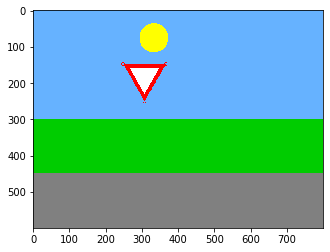

In [232]:
# Source: https://stackoverflow.com/a/46572063
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [[x0, y0]]

vertices = []
for i in range(len(lines)):
    vertices.append(intersection(lines[i-1], lines[i])[0])
               
print(vertices)

output_img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
output_img = img

for point in vertices:
    cv2.circle(output_img, (point[0], point[1]), 5, (0, 0, 255))
    
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))

In [33]:
color = np.array(
    [[[1, 2, 249]]]
)
color.shape
color.astype(np.uint8)

print(cv2.cvtColor(color, cv2.COLOR_BGR2HSV))

error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<3, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 5, -1>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 5, -1>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)
